In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

In [12]:
L, m, V0 = 5, 9.1e-31, 100
hbar = 4.135667696e-15

u0 = np.sqrt(m * L ** 2 * V0 / 2 / hbar ** 2)
n_int = int(2 * u0 / np.pi) + 1

print(f"u0^2 = {round(u0**2, 2)} and no. of intervals = {n_int}")

u0^2 = 66.51 and no. of intervals = 6


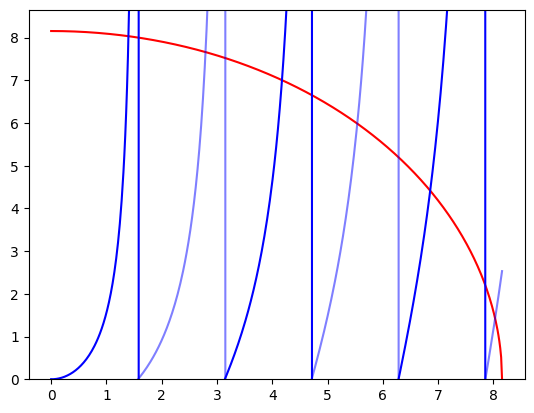

In [13]:
sym = lambda x: np.sqrt(u0**2 - x**2) - x * np.tan(x)
anti_sym = lambda x: np.sqrt(u0**2 - x**2) - x * np.tan(x + 0.5 * np.pi)

x = np.linspace(0, u0, 500)

plt.ylim([0, u0+.5])

plt.plot(x, np.sqrt(u0**2 - x**2), 'r-')
plt.plot(x, x * np.tan(x), 'b-')
plt.plot(x, x * np.tan(x + 0.5 * np.pi), 'b-', alpha= .5)
plt.show()

In [20]:
# intervals where the sign changes
intervals = [[i * np.pi / 2, i * np.pi / 2 + np.pi / 2] for i in range(n_int)]
intervals[-1][1] = u0

v_vals = []

for i, val in enumerate(intervals):
    f = sym if i %2 == 0 else anti_sym
    if np.sign(f(val[0])) == np.sign(f(val[1])):
        print(i, f(val[0]), f(val[1]))
    v_vals += [brentq(f, val[0], val[1])]

E_n = [2 * hbar**2 * v**2 / m / L**2 for v in v_vals]

print(f"Permissible Energies are {[str(round(i, 2)) + " eV" for i in E_n]}")

Permissible Energies are ['2.94 eV', '11.72 eV', '26.21 eV', '46.1 eV', '70.67 eV', '96.95 eV']


In [21]:
k_n = np.array([np.sqrt(2 * m * E) / hbar for E in E_n])
alpha_n = np.array([np.sqrt(2 * m * (V0 - E)) / hbar for E in E_n])

X = np.linspace(-2 * L, 2 * L, 600)

psi_n = []

# A, B = 1 for now, make sure curves are continous
for i in range(n_int):
    if i % 2 == 0:
        H = np.cos(k_n[i] * L / 2) / np.exp(-alpha_n[i] * L / 2)

        psi_n += [(
            ((X > -L / 2) & (X < L / 2)) * np.cos(k_n[i] * X)
            + (X <= -L / 2) * np.exp(alpha_n[i] * X) * H
            + (X >= L / 2) * np.exp( - alpha_n[i] * X) * H
            )]
        
    else:
        H = np.sin(k_n[i] * L / 2) / np.exp(-alpha_n[i] * L / 2)
        
        psi_n += [(
            ((X > -L / 2) & (X < L / 2)) * np.sin(k_n[i] * X)
            + (X <= -L / 2) * np.exp(alpha_n[i] * X) * -H
            + (X >= L / 2) * np.exp( - alpha_n[i] * X) *H
            )]

In [6]:
def reimann_integrate(xs, ys):
    sum, dx = 0, xs[1] - xs[0]
    for y in ys:
        sum += y * dx
    return sum

x = np.linspace(0, np.pi, 500)
reimann_integrate(x, np.sin(x))

1.9999933938612555

In [22]:
# normalize every wavefunction
for i, psi in enumerate(psi_n):
    norm = reimann_integrate(X, psi_n[i] ** 2)
    psi_n[i] = psi / norm ** 0.5

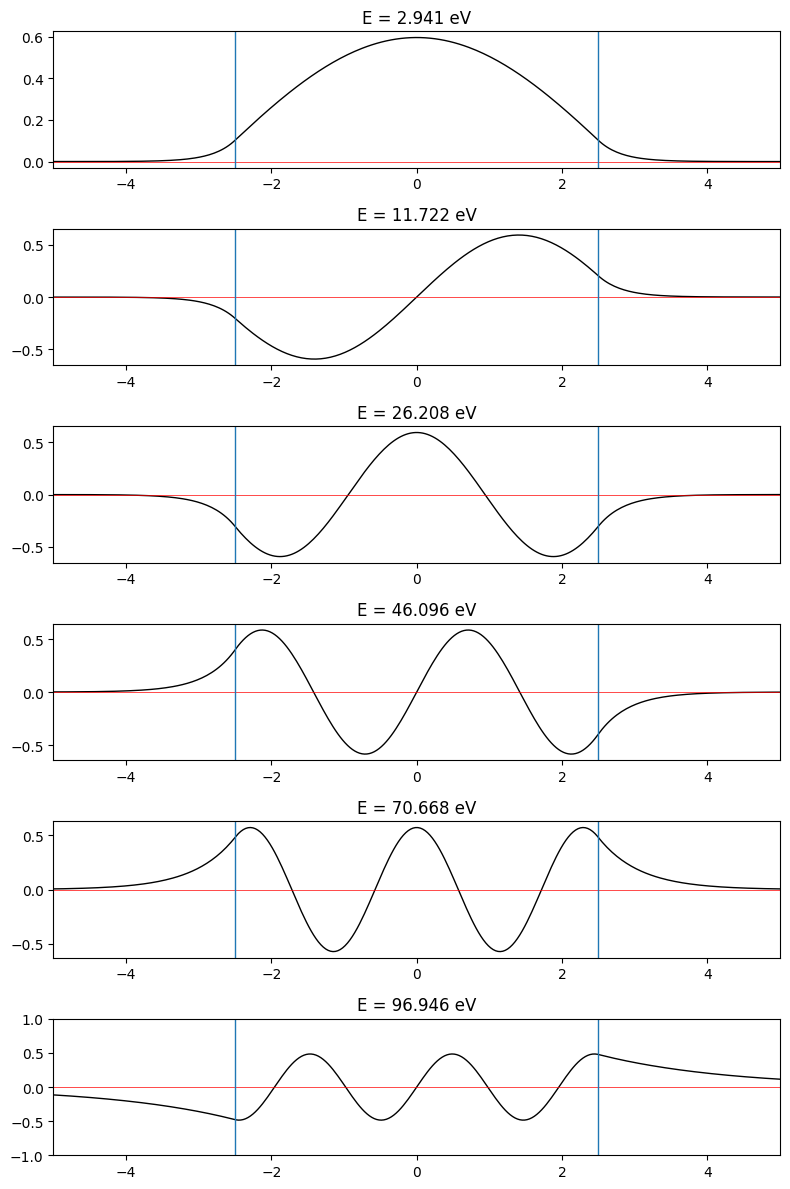

In [23]:
n = len(psi_n)
fig, axes = plt.subplots(n, 1, figsize=(8, n * 2))

if n == 1: axes = [axes]

plt.ylim([-1, 1])
plt.xlim([-L, L])

for i, psi in enumerate(psi_n):
    axes[i].plot(X, psi, 'k', lw = 1)
    axes[i].plot(X, 0*X, 'r', lw = 0.5)

    axes[i].axvline(x = L/2, lw = 1)
    axes[i].axvline(x = -L/2, lw = 1)
        
    # axes[i].set_ylim([-1, 1])
    axes[i].set_xlim([-L, L])
    axes[i].set_title(f'E = {round(E_n[i], 3)} eV')

plt.tight_layout()
plt.show()

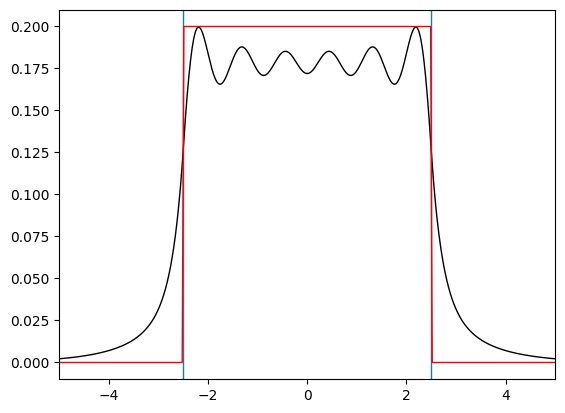

In [24]:
Psi = np.zeros(psi_n[0].shape)
for i, psi in enumerate(psi_n):
    Psi += psi**2 / len(psi_n)
    
plt.xlim([-L, L])
plt.axvline(x = L/2, lw = 1)
plt.axvline(x = -L/2, lw = 1)

unif = ((X < L/2) & (X > -L/2)) * (1/L)

plt.plot(X, Psi, 'k', lw = 1)
plt.plot(X, unif, 'r', lw = 1)
plt.show()